# Part C – Programming Task

## 1. Implement A* search on a maze
We represent the maze as a 2D matrix:
- `1 = wall`
- `0 = free path`
- `A = start`, `B = goal`

We will use Manhattan distance as the heuristic function.

In [5]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

# ---------- Utility Functions ----------
def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def reconstruct_path(came_from, current):
    path = []
    while current in came_from:
        path.append(current)
        current = came_from[current]
    path.append(current)
    return path[::-1]

# ---------- A* Search Implementation ----------
def astar_search(grid, start, goal, heuristic_func):
    rows, cols = len(grid), len(grid[0])
    open_set = []
    heapq.heappush(open_set, (0, start))

    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic_func(start, goal)}

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            return reconstruct_path(came_from, current)

        for dx, dy in [(0,1),(0,-1),(1,0),(-1,0)]:
            neighbor = (current[0]+dx, current[1]+dy)
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor[0]][neighbor[1]] != 1:
                tentative_g = g_score[current] + 1
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score[neighbor] = tentative_g + heuristic_func(neighbor, goal)
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))
    return None

# ---------- Visualization ----------
def visualize(grid, path):
    grid_copy = np.array(grid, dtype=float)
    for (x,y) in path:
        if grid_copy[x,y] == 0:  # mark path
            grid_copy[x,y] = 0.5
    plt.imshow(grid_copy, cmap="gray")
    plt.title("Maze with A* Path")
    plt.show()

## 2. Example Maze

We create a small 5x5 maze with Start at top-left `(0,0)` and Goal at bottom-right `(4,4)`.

Path found: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]


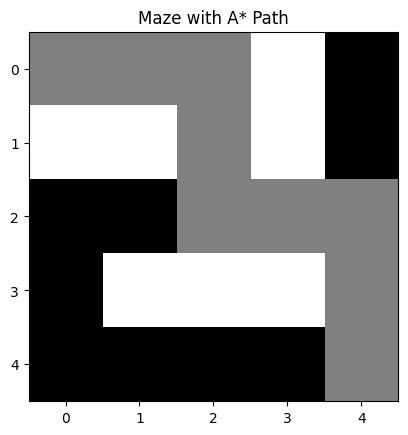

In [6]:
maze = [
    [0,0,0,1,0],
    [1,1,0,1,0],
    [0,0,0,0,0],
    [0,1,1,1,0],
    [0,0,0,0,0]
]

start = (0,0)
goal = (4,4)

path = astar_search(maze, start, goal, manhattan)
print("Path found:", path)
visualize(maze, path)

## 3. Modified Heuristics

### Case 1: 1.5 × Manhattan distance

Path with scaled heuristic: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]


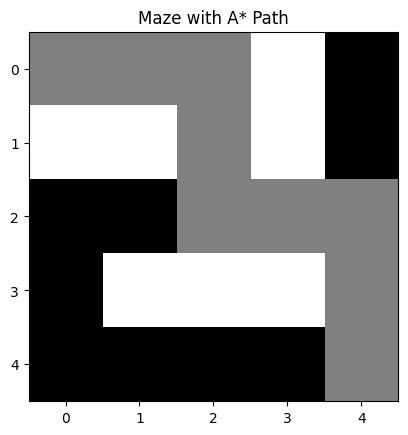

In [7]:
def heuristic_scaled(node, goal):
    return 1.5 * manhattan(node, goal)

path_scaled = astar_search(maze, start, goal, heuristic_scaled)
print("Path with scaled heuristic:", path_scaled)
visualize(maze, path_scaled)

### Case 2: Inconsistent heuristic (violates triangle inequality at one node)

Path with inconsistent heuristic: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]


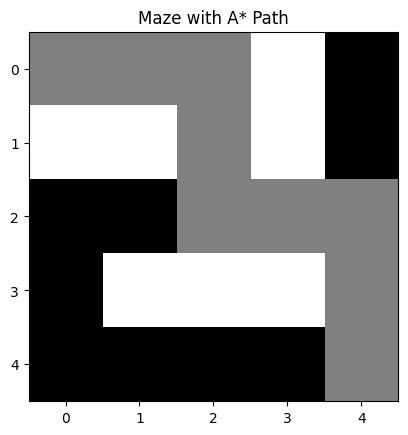

In [8]:
def heuristic_inconsistent(node, goal):
    # normal Manhattan, except inflate one specific cell
    if node == (2,2):
        return 10
    return manhattan(node, goal)

path_inconsistent = astar_search(maze, start, goal, heuristic_inconsistent)
print("Path with inconsistent heuristic:", path_inconsistent)
visualize(maze, path_inconsistent)

## ✅ Summary
1. Manhattan heuristic → admissible & consistent → optimal path found.
2. 1.5× Manhattan → not admissible → A* may fail optimality.
3. Inconsistent heuristic → admissible but not consistent → A* may re-expand nodes.